In [4]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
#movies = pd.read_csv('tmdb_5000_movies.csv')
#movies.head()

In [6]:
#credits = pd.read_csv('tmdb_5000_credits.csv')
#credits.head()
taxi = pd.read_csv('taxi_train.csv')
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
from datetime import datetime
from datetime import timedelta

In [8]:
def getDay(_date):
    return int(datetime.strptime(_date, '%Y-%m-%d %H:%M:%S').strftime('%Y%m'))

def getHour(_date):
    return int(datetime.strptime(_date, '%Y-%m-%d %H:%M:%S').strftime('%H'))

In [131]:
taxi['month'] = taxi['pickup_datetime'].apply(getDay)
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,201603
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,201606
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,201601
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,201604
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,201603


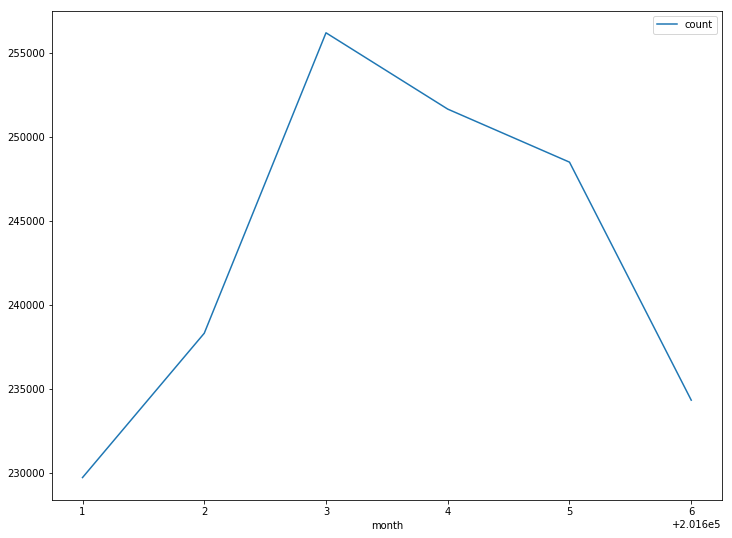

In [132]:
#Распределение по месяцам
unstacked = taxi.groupby('month')[['id']].count()
unstacked.columns = ['count']
unstacked.reset_index()['month'].value_counts()
unstacked.plot()


In [99]:
# Распределение по кол-ву пассажиров

In [101]:
taxi.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'day', 'month'],
      dtype='object')

In [118]:
grouped = taxi.groupby('passenger_count')['id'].count().reset_index()

Text(0.5, 1.0, 'Распределение по кол-ву пассажиров')

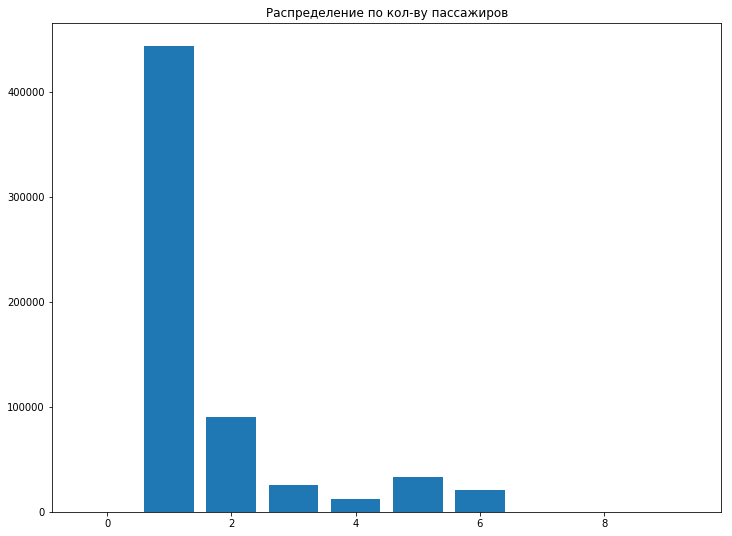

In [120]:
plt.bar(grouped['passenger_count'], grouped['id'])
plt.title('Распределение по кол-ву пассажиров')

In [125]:
grouped

,passenger_count,id
0,0,23
1,1,443447
2,2,90027
3,3,25686
4,4,12017
5,5,33411
6,6,20521
7,9,2


Text(0.5, 1.0, 'Среднее время поездки в секундах в рамках месяца')

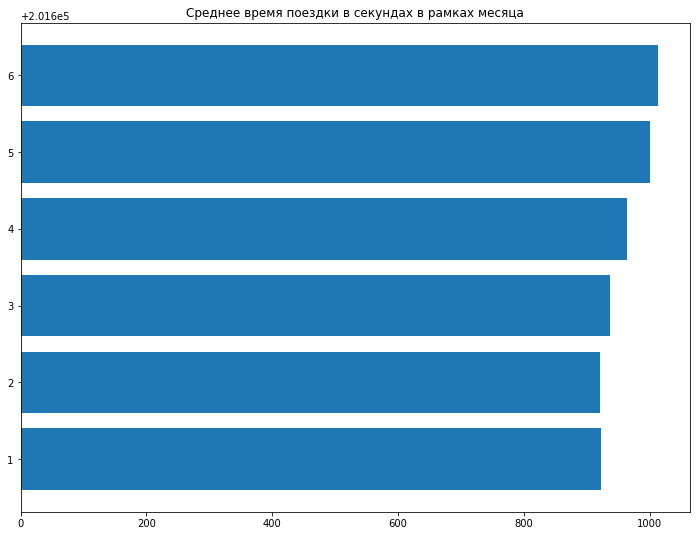

In [148]:
mtrip = taxi.groupby('month')['trip_duration'].mean()
mtrip = mtrip.reset_index('month')
plt.barh(mtrip['month'], mtrip['trip_duration'])
plt.title('Среднее время поездки в секундах в рамках месяца')

In [9]:
#Кол-во поездок по часам
taxi['hour'] = taxi['pickup_datetime'].apply(getHour)
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13


In [13]:
grouped_by_hour = taxi.groupby('hour').count()['id']
grouped_by_hour.reset_index()

,hour,id
0,0,53248
1,1,38571
2,2,27972
3,3,20895
4,4,15792
5,5,15002
6,6,33248
7,7,55600
8,8,67053
9,9,67663


In [14]:
import seaborn as sns

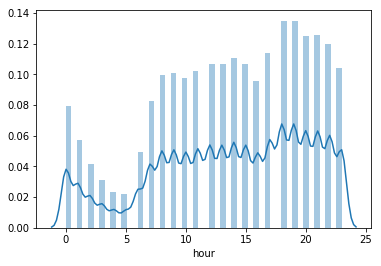

In [19]:
#Кол-во поездок по часам
sns.distplot(taxi['hour'])

In [29]:
taxi_by_vendor = taxi.groupby(['vendor_id']).count()#.head(5)
taxi_by_vendor.head()


,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour
vendor_id,,,,,,,,,,,
1,678342,678342,678342,678342,678342,678342,678342,678342,678342,678342,678342
2,780302,780302,780302,780302,780302,780302,780302,780302,780302,780302,780302


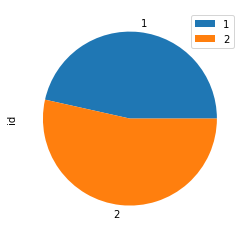

In [31]:
# Кол-во поездок по вендору.
taxi_by_vendor.plot(kind='pie', y='id')